### Is there a correlation between parential involvement?
### Does the type of parential involvement matter?

# Data Prep

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

df = pd.read_csv('pfi_pu.csv').drop_duplicates() # No duplicates

In [2]:
df.describe()

,BASMID,QTYPE,GRADE,SCPUBPRI,DISTASSI,SCHRTSCHL,SNEIGHBRX,SPUBCHOIX,SCONSIDR,SPERFORM,...,F_HMEDICAID,F_HCHIP,F_HSECN8,F_TTLHHINC,F_YRSADDR,F_OWNRNTHB,F_HVINTSPHO,F_HVINTCOM,F_USEINTRNT,F_HHUNID
count,1.407500e+04,14075.000000,14075.000000,14075.000000,14075.000000,14075.000000,14075.000000,14075.000000,14075.000000,14075.000000,...,14075.000000,14075.000000,14075.000000,14075.000000,14075.00000,14075.000000,14075.000000,14075.000000,14075.000000,14075.000000
mean,2.016111e+10,1.960782,9.240710,3.566181,0.846394,1.495915,1.705435,1.827140,1.588561,-0.352327,...,0.084831,0.153037,0.172220,0.105933,0.03325,0.050515,0.027282,0.025364,0.023659,0.016838
std,6.573097e+04,0.194121,4.294132,1.176456,0.843347,1.066981,0.665687,0.948602,0.691015,1.027745,...,0.497308,0.660093,0.697879,0.553713,0.31409,0.386010,0.284796,0.274690,0.265372,0.224132
min,2.016100e+10,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.016106e+10,2.000000,6.000000,4.000000,1.000000,2.000000,2.000000,1.000000,1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.016111e+10,2.000000,10.000000,4.000000,1.000000,2.000000,2.000000,2.000000,2.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.016117e+10,2.000000,13.000000,4.000000,1.000000,2.000000,2.000000,3.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.016123e+10,2.000000,15.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14075 entries, 0 to 14074
Columns: 822 entries, BASMID to F_HHUNID
dtypes: float64(81), int64(738), object(3)
memory usage: 88.4+ MB


In [4]:
# Student Categorical Features
# E1: GRADE     "What is this child’s current grade or year of school?"
# E2: SCPUBPRI  "What type of school does this child attend?"
# 25: HOMESCHLX "Some parents decide to educate their children at home rather than send them to a public or private school. Is this child being schooled at home instead of at school for at least some classes or subjects?"
student_categorical_features = ['GRADE', 'SCPUBPRI', 'HOMESCHLX']

In [5]:
# Student Performance Features
# E13: SEGRADES  "Please tell us about this child's grades during this school year. Overall, across all subjects, what grades does this child get?"
# E20: SEFUTUREX "How far do you expect this child to go in his/her education?"
# E21: SEGRADEQ  "How would you describe his/her work at school?"
# E36: FHWKHRS   "In an average week, how many hours does this child spend on homework outside of school?"
student_performance_features = ['SEGRADES', 'SEFUTUREX', 'SEGRADEQ']

In [6]:
# Parential Involvement Features
# 31: FSFREQ "During this school year, how many times has any adult in the household gone to meetings or participated in activities at this child's school?"
parential_involvement_features = ['FSFREQ']

In [7]:
traditional_schools_df = df[df['SCPUBPRI'] != -1]
# removes homeschooled students

In [8]:
valid_grades_df = df[(df['SEGRADES'] != -1) & (df['SEGRADES'] != 5)]
# -1 is a valid skip, 5 means that the school does not give grades

In [9]:
valid_grades_df.SEGRADES.describe()

count    11913.000000
mean         1.657433
std          0.791418
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: SEGRADES, dtype: float64

In [10]:
valid_grades_df['high_performance'] = valid_grades_df['SEGRADES'].apply(lambda x: math.floor(x/2.5))

/Users/stevedye/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Visualizations

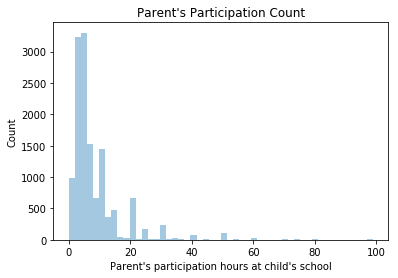

In [11]:
sns.distplot(traditional_schools_df['FSFREQ'], kde=False)
plt.title("Parent's Participation Count")
plt.xlabel("Parent's participation hours at child's school")
plt.ylabel("Count");

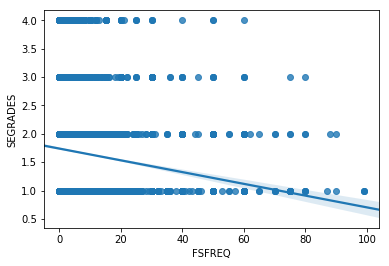

In [12]:
sns.regplot(x='FSFREQ', y='SEGRADES', data=valid_grades_df);

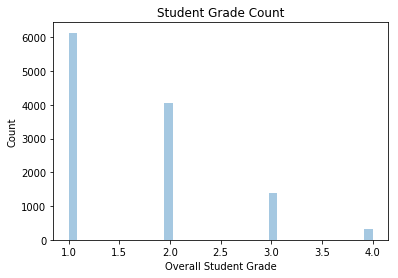

In [13]:
# Count of Grade distribution. 1: Mostly A's 2: Mostly B's 3: Mostly C's 4: Mostly D's or lower
sns.distplot(valid_grades_df['SEGRADES'], kde=False)
plt.title("Student Grade Count")
plt.xlabel("Overall Student Grade")
plt.ylabel("Count");

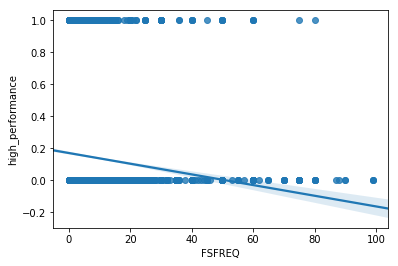

In [14]:
# 0's are A's and B's, 1's are C's and lower
sns.regplot(x='FSFREQ', y='high_performance', data=valid_grades_df);

In [15]:
test = valid_grades_df.groupby('high_performance').FSFREQ.mean()
test

high_performance
0    8.195917
1    5.990725
Name: FSFREQ, dtype: float64

In [16]:
test3 = valid_grades_df[['high_performance', 'FSFREQ']]
test3

,high_performance,FSFREQ
0,0,6
1,0,10
4,0,10
5,0,3
6,0,1
...,...,...
14069,1,3
14070,0,8
14071,0,25
14072,0,5


In [26]:
valid_grades_df[['high_performance', 'FSFREQ']].groupby('high_performance').describe()
# 0's are A's and B's, 1's are C's and lower

FSFREQ                                               
                    count      mean       std  min  25%  50%   75%   max
high_performance                                                        
0                 10188.0  8.195917  9.280269  0.0  3.0  5.0  10.0  99.0
1                  1725.0  5.990725  7.236390  0.0  2.0  4.0   6.0  80.0

In [27]:
valid_grades_df[['FSFREQ','SEGRADES']].groupby('SEGRADES').describe()

FSFREQ                                               
           count      mean       std  min  25%  50%   75%   max
SEGRADES                                                       
1         6138.0  8.886119  9.786589  0.0  3.0  5.0  10.0  99.0
2         4050.0  7.149877  8.348397  0.0  3.0  5.0   8.0  90.0
3         1393.0  6.009332  7.298386  0.0  2.0  4.0   6.0  80.0
4          332.0  5.912651  6.980436  0.0  3.0  4.0   6.0  60.0

In [21]:
df[df['FSFREQ']==99]['SEGRADES']

3716     1
7089     5
11679    1
12522    5
12631    1
Name: SEGRADES, dtype: int64

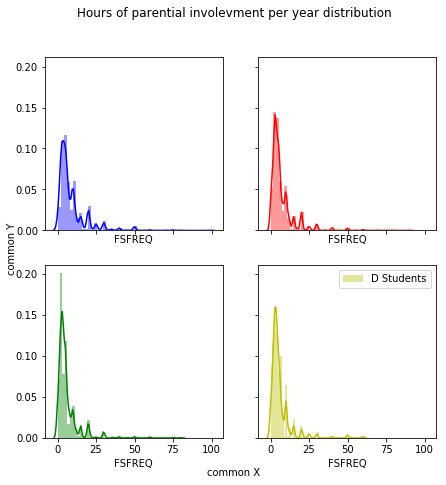

In [22]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True, sharey=True)
plt.suptitle("Hours of parential involevment per year distribution")
f.text(0.5, 0.05, 'common X', ha='center')
f.text(0.05, 0.5, 'common Y', va='center', rotation='vertical')

sns.distplot(valid_grades_df[valid_grades_df['SEGRADES']==1]['FSFREQ'],
             label="A Students", color="b", ax=axes[0, 0])
sns.distplot(valid_grades_df[valid_grades_df['SEGRADES']==2]['FSFREQ'], 
             label="B Students", color="r", ax=axes[0, 1])
sns.distplot(valid_grades_df[valid_grades_df['SEGRADES']==3]['FSFREQ'],
             label="C Students", color="g", ax=axes[1, 0])
sns.distplot(valid_grades_df[valid_grades_df['SEGRADES']==4]['FSFREQ'],
             label="D Students", color="y", ax=axes[1, 1])
plt.legend()
plt.plot();

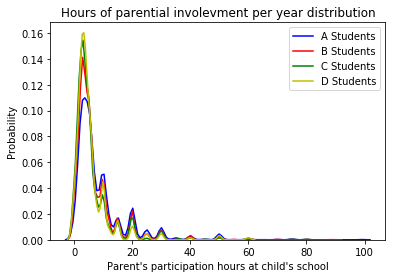

In [23]:
sns.distplot(valid_grades_df[valid_grades_df['SEGRADES']==1]['FSFREQ'], 
             color="b", label="A Students", hist=False, hist_kws=dict(alpha=0.5))
sns.distplot(valid_grades_df[valid_grades_df['SEGRADES']==2]['FSFREQ'], 
             color="r", label="B Students", hist=False, hist_kws=dict(alpha=0.5))
sns.distplot(valid_grades_df[valid_grades_df['SEGRADES']==3]['FSFREQ'], 
             color="g", label="C Students", hist=False, hist_kws=dict(alpha=0.5))
sns.distplot(valid_grades_df[valid_grades_df['SEGRADES']==4]['FSFREQ'], 
             color="y", label="D Students", hist=False, hist_kws=dict(alpha=0.5))
plt.legend()
plt.title("Hours of parential involevment per year distribution")
plt.xlabel("Parent's participation hours at child's school")
plt.ylabel("Probability");

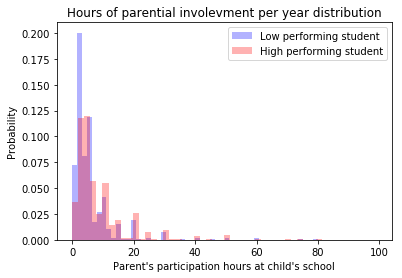

In [24]:
sns.distplot(valid_grades_df[valid_grades_df['high_performance']==1]['FSFREQ'], 
             kde=False, norm_hist=True, color="b", label="Low performing student", hist_kws=dict(alpha=0.3))
sns.distplot(valid_grades_df[valid_grades_df['high_performance']==0]['FSFREQ'], 
             kde=False, norm_hist=True, color="r", label="High performing student", hist_kws=dict(alpha=0.3))
plt.legend()
plt.title("Hours of parential involevment per year distribution")
plt.xlabel("Parent's participation hours at child's school")
plt.ylabel("Probability");

In [25]:
# Use Mann-Whitney U Test
# dependent:ordinate or coninuous level
# inde: 2 categorical groups
# independence of observations
# Two variable not normally distributed
# Similar shape

### Things I still want to do
Calculation from actual count to weighted count

In [ ]:
# t test